In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/content/drive/MyDrive/framingham.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4238, 16)

In [6]:
df.size

67808

In [7]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [9]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df[:2]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [11]:
df['education'].value_counts(normalize=True)*100

1.0    41.616259
2.0    30.316961
3.0    16.622308
4.0    11.444471
Name: education, dtype: float64

In [12]:
from sklearn.impute import KNNImputer

In [13]:
columns = [['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']]
impute = KNNImputer(n_neighbors = 9)
for i in columns:
    df[i] = impute.fit_transform(df[i])

In [14]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
#EDA

In [16]:
df[:2]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [17]:
df.rename(columns={"male":"gender"}, inplace =  True)

In [18]:
df[:2]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [19]:
df['gender'].value_counts()

0    2419
1    1819
Name: gender, dtype: int64

In [20]:
df['age'].min(), df['age'].max()

(32, 70)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

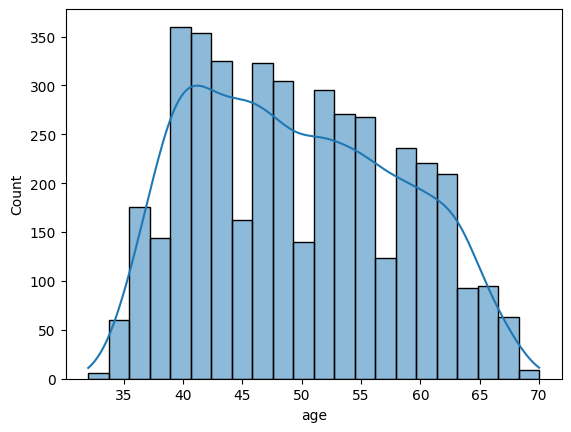

In [22]:
sns.histplot(data = df, x="age",kde=True)
plt.show()

In [23]:
df['currentSmoker'].value_counts(normalize = True)*100

0    50.589901
1    49.410099
Name: currentSmoker, dtype: float64

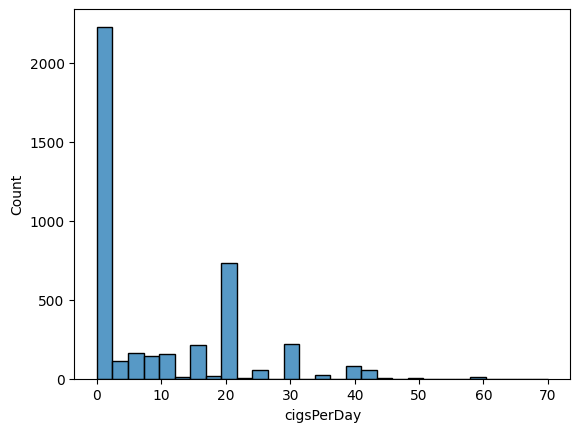

In [24]:
sns.histplot(data=df, x="cigsPerDay")
plt.show()

In [25]:
df['BPMeds'].value_counts()

0.000000    4100
1.000000     124
0.111111      14
Name: BPMeds, dtype: int64

In [26]:
y = df['TenYearCHD']

In [27]:
X = df.drop(columns="TenYearCHD")

In [28]:
X.shape

(4238, 15)

In [29]:
y.shape

(4238,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(3390, 15)

In [32]:
y_train.shape

(3390,)

In [33]:
X_test.shape, y_test.shape

((848, 15), (848,))

In [34]:
df[:3]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [35]:
# prompt: import standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
y_test[:10]

3188    0
764     0
3264    0
1967    0
2185    0
393     0
2333    1
1159    0
3788    0
1674    1
Name: TenYearCHD, dtype: int64

In [39]:
pd.DataFrame({
    "Actual": y_test,
    "predicted": y_pred
})[:15]

,Actual,predicted
3188,0,0
764,0,0
3264,0,0
1967,0,0
2185,0,0
393,0,0
2333,1,0
1159,0,0
3788,0,0
1674,1,0


In [40]:
model.score(X_test, y_test)

0.8573113207547169

In [41]:
model.score(X_train, y_train)

0.8548672566371681

In [42]:
# prompt: import r2 score

from sklearn.metrics import r2_score

r2_score_model = r2_score(y_test, y_pred)
print("R2 Score:", r2_score_model * 100)

R2 Score: -14.293352343610755


In [43]:
model.coef_

array([[ 0.21494318,  0.57183733,  0.03328953, -0.01271295,  0.27893144,
         0.04401033,  0.07357614,  0.0907214 ,  0.00156521,  0.04087167,
         0.30882841,  0.01788746, -0.01694299, -0.0657164 ,  0.18885262]])

In [44]:
model.intercept_

array([-1.97123212])

In [45]:
# prompt: import accuracy score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)


Accuracy: 85.73113207547169


**Let's Improve the Score by checking with the CV - Cross validation**

In [47]:
df1 = df

In [48]:
df1.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
X = df1.drop(columns={"TenYearCHD"})

In [51]:
y = df['TenYearCHD']

In [52]:
X.shape, y.shape

((4238, 15), (4238,))

In [53]:
# prompt: import train test split

from sklearn.model_selection import train_test_split
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.25,random_state=1)

In [54]:
X_test.shape, y_test.shape

((848, 15), (848,))

In [55]:
# prompt: import standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [56]:
# prompt: import Logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
model.coef_

array([[ 0.22227067,  0.58535055,  0.02438671, -0.06570819,  0.30855561,
         0.03117776,  0.08007633, -0.00478253,  0.03896179,  0.08912729,
         0.31058245,  0.08798583, -0.11481075, -0.05661747,  0.22148162]])

In [58]:
model.intercept_

array([-2.03205876])

In [63]:
y_pred_cv =  model.predict(X_val)
y_pred_cv[:15]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
y_val[:15]

1430    1
1810    0
1655    0
2760    0
4085    0
4084    0
1266    1
3685    0
2295    0
2954    1
1683    0
1753    0
3161    0
2859    0
4144    1
Name: TenYearCHD, dtype: int64

In [71]:
pd.DataFrame({
    "Actual": y_val,
    "predicted": y_pred_cv
})[:35]

,Actual,predicted
1430,1,0
1810,0,0
1655,0,0
2760,0,0
4085,0,0
4084,0,1
1266,1,0
3685,0,0
2295,0,0
2954,1,0


Checking how much varies from the Data

In [77]:
zero = 0
one = 0
for i in y_pred_cv:
  if i == 0:
    zero +=1
  else:
    one +=1

print(zero)
print(one)

827
21


In [80]:
# Error
y_val.shape, y_pred_cv.shape

((848,), (848,))

In [83]:
Error = y_pred_cv - y_val
Error[:10]

1430   -1
1810    0
1655    0
2760    0
4085    0
4084    1
1266   -1
3685    0
2295    0
2954   -1
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='Density'>

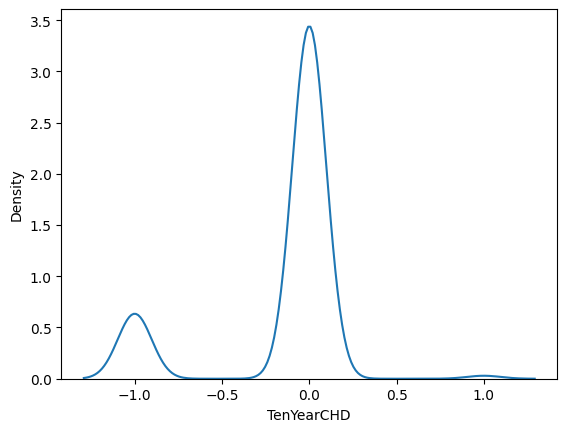

In [84]:
sns.kdeplot(Error)

Check for the MSE

In [85]:
# prompt: import mean sqaure error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred_cv)
print("Mean squared error:", mse)

Mean squared error: 0.1615566037735849


In [86]:
# prompt: import mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred_cv)
print("Mean absolute error:", mae)

Mean absolute error: 0.1615566037735849


In [68]:
model.score(X_train, y_train)

0.8615263571990559

In [69]:
model.score(X_val, y_val)

0.8384433962264151

In [70]:
model.score(X_test, y_test)

0.8596698113207547

Here, we can conclude from the Cross validation That very very low value has been increased from the training and testing Data

SO, the cross validation gives somewhat good result as per from the Data,